<a href="https://colab.research.google.com/github/mralamdari/CV-Yolo/blob/main/Yolo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO V3
#### yolov3 pretrained weights from [DarkNet](https://pjreddie.com/darknet/yolo/)


#Step 0: Essentials

In [ ]:
import os
import cv2
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def imShow(path):
  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
#Sample Videos
!wget https://assets.mixkit.co/videos/download/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-busy-street-in-the-city-4000.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-crowds-of-people-cross-a-street-junction-4401.mp4
!wget https://assets.mixkit.co/videos/download/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4

In [ ]:
#Sample Images
!wget https://cdn.pixabay.com/photo/2016/11/23/15/32/pedestrians-1853552_960_720.jpg
!wget https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014616_960_720.jpg
!wget https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014617_960_720.jpg

--2022-09-09 03:51:15--  https://cdn.pixabay.com/photo/2016/11/23/15/32/pedestrians-1853552_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253916 (248K) [image/jpeg]
Saving to: ‘pedestrians-1853552_960_720.jpg’

pedestrians-1853552 100%[===================>] 247.96K  --.-KB/s    in 0.004s  

2022-09-09 03:51:15 (57.7 MB/s) - ‘pedestrians-1853552_960_720.jpg’ saved [253916/253916]

--2022-09-09 03:51:15--  https://cdn.pixabay.com/photo/2017/01/28/02/24/japan-2014616_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::6812:25f4, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272160 (266K) [image/jpeg]
Saving to: ‘japan-2014616_960_720.jpg’

#Step 1: Darknet
To use yolo v3 model, you can get it easily from darknet or you can create a yolo v3 model from scratch

In [ ]:
#clone Darknet
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 20 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.10 MiB | 15.85 MiB/s, done.
Resolving deltas: 100% (10397/10397), done.


In [ ]:
# change makefile to have gpu and opencv enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
#Build(make) Darknet
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

#Step 2: Dataset

## Yolo with COCO Dataset
This Yolo model has been trained on COCO Dataset (as default) and has more than 80 classes.

In [ ]:
# Download Pre-trained Weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2022-09-09 03:32:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   107MB/s    in 2.2s    

2022-09-09 03:32:16 (107 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



###Image Prediction

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

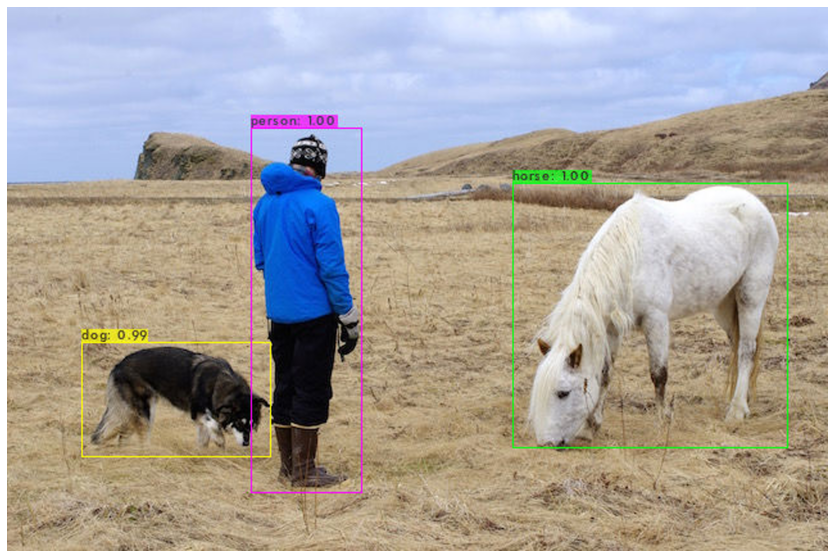

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg -dont_show
imShow('predictions.jpg')

###Video Prediction

In [ ]:
output_video = '/content/results.avi'
!./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights /content/mixkit-talented-freestyle-soccer-player-juggling-the-ball-43519.mp4 -dont_show -i 0 -out_filename $output_video
os.path.exists('/content/1490031016.mp4')

Streaming output truncated to the last 5000 lines.
person: 100% 

FPS:20.5 	 AVG_FPS:15.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.7 	 AVG_FPS:15.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.5 	 AVG_FPS:15.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.5 	 AVG_FPS:15.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.2 	 AVG_FPS:15.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:20.7 	 AVG_FPS:15.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:20.2 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:20.5 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:20.9 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.3 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.7 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.8 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.6 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.5 	 AVG_FPS:20.3

 cvWriteFrame 
Objects:

person: 100% 

FPS:21.8 	 AVG_FPS:20.3


False

## Yolo with Custom Dataset
Here you can add your dataset and detect the objects you desire.

### There are several ways to gather data for object detection:
#### 1. Get Pre-labeled data from Online Resources like [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)
##### 2. Download Images and Label them yourself 
(zip the images folder with labels and upload it to your Google Drive)

to get Images from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html) and convert them to yolo's input types, use [OIDv4 ToolKit](https://github.com/mralamdari/OIDv4_ToolKit.git) that I've adjusted.

In [ ]:
#clone OIDv4_ToolKit
%cd /content/darknet
!git clone https://github.com/mralamdari/OIDv4_ToolKit.git

/content/darknet
Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 496 (delta 30), reused 0 (delta 0), pack-reused 444
Receiving objects: 100% (496/496), 34.11 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [ ]:
#install necessary libraries
!pip3 install -r requirements.txt
!pip install awscli

In [ ]:
#Move to OIDv4_ToolKit folder
%cd OIDv4_ToolKit

#mention  the number of object you want to train.
NUM_CLASSES=2

#write your desired objects and how many images you want
!python3 main.py downloader --classes Person Car --type_csv train --limit 200

/content/darknet/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Person.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...145%, 0 MB, 64155 KB/s, 0 sec

In [ ]:
#1. convert the labels in to yolov3's inputs format
#2. delete the labels folder
#3. transfer '/content/darknet/OIDv4_ToolKit/OID/Dataset/{train/test}' to '/content/darknet/data/obj/{train/test}'
#4. Create obj.names in /content/darknet/data/ directory
#5. Create {train/test}.txt in /content/darknet/data/ directory

!python mralamdari_annotations_converter.py

Currently in subdirectory: train
Converting annotations for class: Person
100% 200/200 [00:13<00:00, 14.78it/s]
Converting annotations for class: Car
100% 200/200 [00:07<00:00, 25.58it/s]


### Adjust yolov3-custom to trainning


In [ ]:
with open('/content/darknet/cfg/yolov3.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[2] = '#'+config_files[2] # batch=1
config_files[3] = '#'+config_files[3] # subdivisions=1

config_files[5] = config_files[5][2:]  # batch=64
config_files[6] = config_files[6][2:]  # subdivisions=16


num_classes=NUM_CLASSES
max_batches = 4000 if num_classes==1 else num_classes*2000
config_files[19] = f'max_batches={max_batches}\n'
config_files[21] = f'steps={max_batches*8//10},{max_batches*9//10}\n'


for i, j in enumerate(config_files):
    if j == '[yolo]\n':
        config_files[i-4] = f"filters={3*(5+num_classes)}\n" # convolutional filters
        config_files[i+3] = f"classes={num_classes}\n"       # yolo_classes
        config_files[i+8] = 'random=1\n'                     # yolo_random  0 or 1


with open('/content/darknet/cfg/yolov3-custom.cfg', 'w+') as f:
    f.writelines(config_files)

### Obj.data

In [ ]:
with open('/content/darknet/data/obj.data', 'w+') as obj_data:
  odata = f"""classes={num_classes}
  train=/content/darknet/data/train.txt
  valid=/content/darknet/data/test.txt
  names=/content/darknet/data/obj.names
  backup=/content/drive/MyDrive/yolo_backup
  """
  obj_data.write(odata)

os.makedirs('/content/drive/MyDrive/yolo_backup', exist_ok=True)

#Step 3: Model

###Get pre-trained weights for yolo

In [ ]:
%cd /content/darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content/darknet
--2022-09-09 03:59:19--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  17.1MB/s    in 10s     

2022-09-09 03:59:30 (14.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



### Train from scratch

#####Use this code, so colab won't crash after being inactive for more than 10 mins;

    function ClickConnect(){
    console.log("Working"); 
    document.querySelector("colab-toolbar-button#connect").click() 
    }
    setInterval(ClickConnect,60000)

In [ ]:
#To get mAP (when you have test files)
# !./darknet detector map /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/darknet/darknet53.conv.74 -dont_show

!./darknet detector train /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/darknet/darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.456129), count: 6, class_loss = 2.033302, iou_loss = 1.880791, total_loss = 3.914093 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.005542, iou_loss = 0.000000, total_loss = 0.005542 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.002832, iou_loss = 0.000000, total_loss = 0.002832 
 total_bbox = 97276, rewritten_bbox = 0.940623 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.004739, iou_loss = 0.000000, total_loss = 0.004739 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.416052), count: 10, class_loss = 3.485132, iou_loss = 4.035369, total_loss = 7.520501 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.0

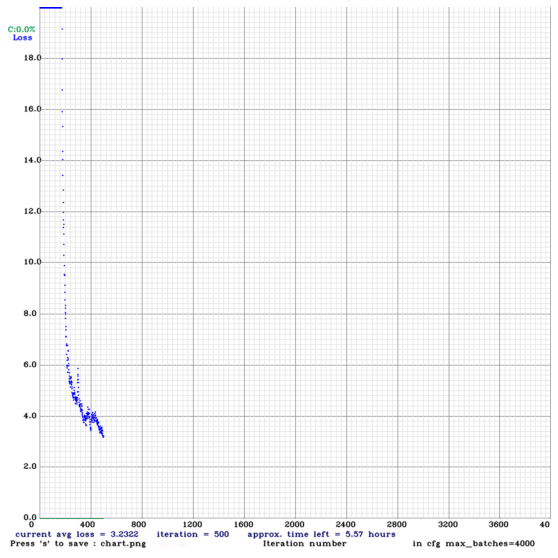

In [ ]:
imShow('chart.png')

### Train from where you ceased training with saved weights.

In [ ]:
!./darknet detector train /content/darknet/data/obj/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolo_backup/yolov3-custom_last.weights -dont_show

In [ ]:
imShow('chart.png')

### Adjust yolov3-custom.cfg for testing


In [ ]:
config_files[5] = '#'+config_files[5] # batch=64
config_files[6] = '#'+config_files[6] # subdivisions=16

config_files[2] = config_files[2][2:]  # batch=1
config_files[3] = config_files[3][2:]  # subdivisions=1


with open('/content/darknet/cfg/yolov3-custom.cfg', 'r+') as f:
    config_files = f.readlines()

config_files[5] = '#'+config_files[5] # batch=64
config_files[6] = '#'+config_files[6] # subdivisions=16

config_files[2] = config_files[2][2:]  # batch=1
config_files[3] = config_files[3][2:]  # subdivisions=1

with open('/content/darknet/cfg/yolov3-custom.cfg', 'r+') as f:
    f.writelines(config_files)

##Predict 

###Image Prediction

In [ ]:
%cd /content/darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolo_backup/yolov3-custom_last.weights /content/darknet/data/person.jpg -thresh 0.5 -dont_show

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
batch: Using default '1'
subdivisions: Using default '1'
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1

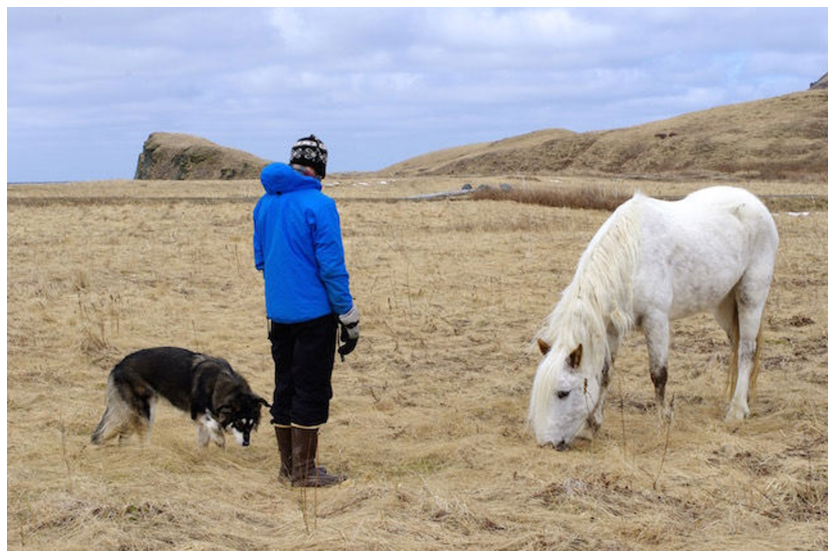

In [ ]:
imShow('predictions.jpg')

###Video Prediction

In [ ]:
%cd /content/darknet
output_video = '/content/results.avi'

!./darknet detector demo /content/darknet/data/obj.data /content/darknet/cfg/yolov3-custom.cfg /content/drive/MyDrive/yolo_backup/yolov3-custom_final.weights /content/1490031016.mp4 -dont_show -i 0 -out_filename $output_video